In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
extracted_path_ba = '/content/BeerReviews/BeerAdvocate'
extracted_path_rb = '/content/BeerReviews/RateBeer'
extracted_path_mbd = '/content/BeerReviews/MatchedData'

if not os.path.exists(extracted_path_ba):
  os.makedirs(extracted_path_ba)

if not os.path.exists(extracted_path_rb):
  os.makedirs(extracted_path_rb)

if not os.path.exists(extracted_path_mbd):
    os.makedirs(extracted_path_mbd)

In [3]:
# We have to extract files into this folder - from BeerAdvocate

!tar -xvf /content/drive/MyDrive/Beerreviews/BeerAdvocate.tar.gz -C /content/BeerReviews/BeerAdvocate

beers.csv
reviews.txt.gz
users.csv
breweries.csv
ratings.txt.gz


In [4]:
!tar -xvf /content/drive/MyDrive/Beerreviews/RateBeer.tar.gz -C /content/BeerReviews/RateBeer

beers.csv
reviews.txt.gz
users.csv
breweries.csv
ratings.txt.gz


In [5]:
!tar -xvf /content/drive/MyDrive/Beerreviews/matched_beer_data.tar.gz -C /content/BeerReviews/MatchedData

ratings.csv
ratings_ba.txt.gz
ratings_rb.txt.gz
users_approx.csv
users.csv
beers.csv
breweries.csv
ratings_with_text_ba.txt.gz
ratings_with_text_rb.txt.gz


### What's behind the data

In [6]:
beers_advocate = pd.read_csv('/content/BeerReviews/BeerAdvocate/beers.csv')
beers_advocate.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [7]:
# Information about breweries - name is linked to the location, which we need!
breweries_advocate = pd.read_csv('/content/BeerReviews/BeerAdvocate/breweries.csv')

How many beers do we have that come from the US?

In [8]:
beer_with_location = pd.merge(beers_advocate, breweries_advocate, left_on='brewery_id', right_on='id')
ny_beers = beer_with_location[beer_with_location['location'] == 'United States, New York'].sort_values(by='nbr_ratings', ascending=False)
ny_beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,id,location,name,nbr_beers
129056,38394,Pumking,3818,Southern Tier Brewing Company,Pumpkin Ale,7500,1951,4.01,90.0,81.0,8.6,4.049132,NaN,0,NaN,3818,"United States, New York",Southern Tier Brewing Company,145
119949,680,Brooklyn Black Chocolate Stout,45,Brooklyn Brewery,Russian Imperial Stout,6676,2810,4.15,93.0,91.0,10.0,4.149348,0.495761,2861,4.151234,45,"United States, New York",Brooklyn Brewery,181
119743,3457,Three Philosophers Belgian Style Blend (Quadru...,42,Brewery Ommegang,Quadrupel (Quad),6430,2101,4.12,92.0,91.0,9.7,4.149574,NaN,0,NaN,42,"United States, New York",Brewery Ommegang,104
119692,141,Hennepin (Farmhouse Saison),42,Brewery Ommegang,Saison / Farmhouse Ale,6004,2176,4.17,93.0,96.0,7.7,4.151939,NaN,0,NaN,42,"United States, New York",Brewery Ommegang,104
127802,6076,Flower Power India Pale Ale,651,Ithaca Beer Company,American IPA,5272,1288,4.17,93.0,NaN,7.5,4.226168,NaN,0,NaN,651,"United States, New York",Ithaca Beer Company,193


In [12]:
# We want to see from the merged table beer_with_location how many beers do we have from the US

us_beers = beer_with_location[beer_with_location['location'].str.startswith('United States')]
print(f"Number of beers from the US: {len(us_beers)}")


Number of beers from the US: 204752


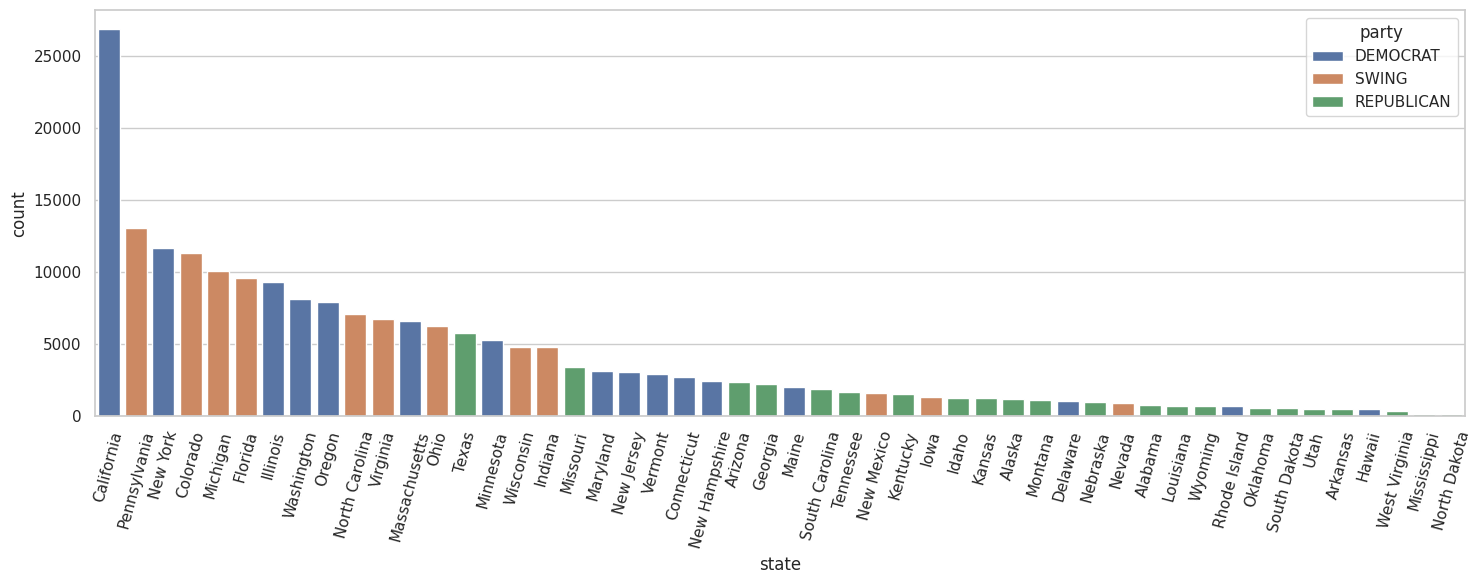

In [13]:
# And from which states? How many?
party_winners_path = '/content/party_winners.csv'
party_winners = pd.read_csv(party_winners_path)

us_states = us_beers['location'].str.split(', ').str[-1].value_counts()
us_states_for_plotting = pd.merge(us_states, party_winners, left_on='location', right_on='state')
us_states_for_plotting = us_states_for_plotting[['count', 'state', 'party']]

# Histogram showing the number of states
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.barplot(data=us_states_for_plotting, x='state', y='count', hue='party')
plt.xticks(rotation=75)
plt.tight_layout()

In [14]:
users_beer_advocate = pd.read_csv('/content/BeerReviews/BeerAdvocate/users.csv')
users_beer_advocate['joined'] = pd.to_datetime(users_beer_advocate['joined'], unit='ms')
#users_beer_advocate.head(10)
print("We have information about", len(users_beer_advocate), "users")

We have information about 153704 users


How many users do come from US?

In [15]:
# Some locations are NaN - we get rid of them
users_beer_advocate.location.isna().sum()
users_beer_advocate.dropna(subset=['location'], inplace=True)

# Check how many of them come from the US
us_users = users_beer_advocate[users_beer_advocate['location'].str.startswith('United States')]
print(f"Number of users from the US: {len(us_users)}")

Number of users from the US: 113223


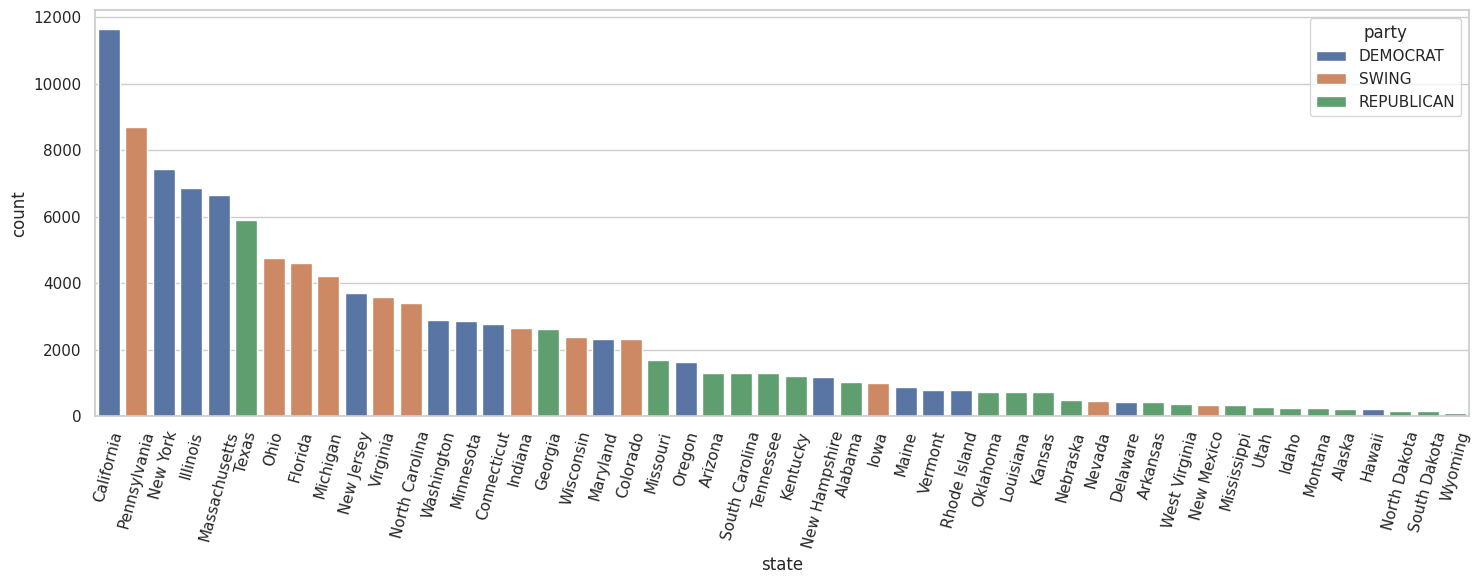

In [16]:
# And from which states? How many?

us_states = us_users['location'].str.split(', ').str[-1].value_counts()
users_states_for_plotting = pd.merge(us_states, party_winners, left_on='location', right_on='state')
users_states_for_plotting = users_states_for_plotting[['count', 'state', 'party']]

# Histogram showing the number of states
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.barplot(data=users_states_for_plotting, x='state', y='count', hue='party')
plt.xticks(rotation=75)
plt.tight_layout()

In [17]:
!gzip -dc /content/BeerReviews/BeerAdvocate/reviews.txt.gz > /content/BeerReviews/BeerAdvocate/reviewes_beer_adv.txt

In [19]:
# We need to parse manually data to put it into pandas dataframe
data = []

# Read the entire file as a string
with open('/content/BeerReviews/BeerAdvocate/reviewes_beer_adv.txt', 'r') as file:
    content = file.read()

# Split the content by double newlines to get individual rows
rows = content.strip().split('\n\n')

In [20]:
len(rows)

2589586

In [29]:
# Create dictionary out of this reviews that will be turned into pandas DF
beer_name = []
beer_id = []
brewery_name = []
brewery_id = []
style = []
abv = []
date = []
user_name = []
user_id = []
appearance = []
aroma = []
palate = []
taste = []
overall = []
rating = []
text = []

# Function to parse review according to format
def parse_review(rows, beer_name, beer_id, brewery_name, brewery_id, style, abv, date, user_name, user_id, appearance, aroma, palate, taste, overall, rating, text):

    i = 0
    for row in rows:
        print(i)
        i = i + 1
        review = row.split('\n')
        #print(review)
        for element in review:
            # Append beer name
            if element.startswith('beer_name'):
                beer_name.append(element.split(': ')[1])
            # Append beer_id
            elif element.startswith('beer_id'):
                beer_id.append(element.split(': ')[1])
            # Append brewery_name
            elif element.startswith('brewery_name'):
                brewery_name.append(element.split(': ')[1])
            # Append brewery_id
            elif element.startswith('brewery_id'):
                brewery_id.append(element.split(': ')[1])
            # Append style
            elif element.startswith('style'):
                style.append(element.split(': ')[1])
            # Append abv
            elif element.startswith('abv'):
                abv.append(element.split(': ')[1])
            # Append date
            elif element.startswith('date'):
                date.append(element.split(': ')[1])
            # Append user_name
            elif element.startswith('user_name'):
                user_name.append(element.split(': ')[1])
            # Append user_id
            elif element.startswith('user_id'):
                user_id.append(element.split(': ')[1])
            # Append appearance
            elif element.startswith('appearance'):
                appearance.append(element.split(': ')[1])
            # Append aroma
            elif element.startswith('aroma'):
                aroma.append(element.split(': ')[1])
            # Append palate
            elif element.startswith('palate'):
                palate.append(element.split(': ')[1])
            # Append taste
            elif element.startswith('taste'):
                taste.append(element.split(': ')[1])
            # Append overall
            elif element.startswith('overall'):
                overall.append(element.split(': ')[1])
            # Append rating
            elif element.startswith('rating'):
                rating.append(element.split(': ')[1])
            # Append text
            elif element.startswith('text'):
                text.append(element.split(': ')[1])

    dictionary = {'beer_name' : beer_name,
            'beer_id' : beer_id,
            'brewery_name': brewery_name,
            'brewery_id': brewery_id,
            'style': style,
            'abv' : abv,
            'date': date,
            'user_name' : user_name,
            'user_id' : user_id,
            'appearance' : appearance,
            'aroma' : aroma,
            'palate' : palate,
            'taste' : taste,
            'overall' : overall,
            'rating' : rating,
            'text' : text}


    return dictionary

In [ ]:
dictionary = parse_review(rows, beer_name, beer_id, brewery_name, brewery_id, style, abv, date, user_name, user_id, appearance, aroma, palate, taste, overall, rating, text)

In [31]:
review_df = pd.DataFrame(dictionary)

In [36]:
review_df.head(5)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,Serving
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."


In [38]:
column = pd.to_datetime(review_df['date'], unit='s').dt.date
review_df['readable_date'] = column
review_df.head(5)

<ipython-input-38-41b3a581bc38>:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  column = pd.to_datetime(review_df['date'], unit='s').dt.date


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,readable_date
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",2015-08-20
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...,2009-02-20
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",2006-03-13
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,Serving,2004-12-01
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",2004-08-30


In [53]:
# I want to filter out first all the reviews that are in year 2004 - our first election year
reviews_2004 = review_df[pd.to_datetime(review_df['readable_date']).dt.year == 2004]
length_2004 = len(reviews_2004)
print(f"Number of reviews that is from 2004: {length_2004}")

# Let's see how many different beers is reviewed
unique_beers_2004 = reviews_2004[['beer_name', 'beer_id']].value_counts()
print(f"Number of unique beers reviewed in 2004: {len(unique_beers_2004)}")

Number of reviews that is from 2004: 62994
Number of unique beers reviewed in 2004: 10450


In [63]:
# Merging reviews with breweries (to get location of brewerie)
reviews_2004.loc[:, 'brewery_id'] = reviews_2004['brewery_id'].astype('int64')
rb_2004 = pd.merge(reviews_2004, breweries_advocate, left_on='brewery_id', right_on='id')

# Merging reviews with user countries (to get where reviewer comes from)
rbr_2004 = pd.merge(rb_2004, users_beer_advocate, left_on='user_id', right_on='user_id')

# Location of brewery has name location_x, while location of user has name location_y we need to rename them
# Additionally, drop user_name_y
rbr_2004.rename(columns={'location_x': 'brewery_location', 'location_y': 'user_location', 'user_name_x' : 'user_name'}, inplace=True)
rbr_2004.drop('user_name_y', axis=1, inplace=True)

In [83]:
rbr_2004.head(50)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,text,readable_date,id,brewery_location,name,nbr_beers,nbr_ratings,nbr_reviews,joined,user_location
0,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,...,Serving,2004-12-01,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,31,31,1970-01-13 17:56:20.400,Northern Ireland
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,...,"500ml bottlePours with a light, slightly hazy ...",2004-08-30,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,604,604,1970-01-13 09:02:06.000,Northern Ireland
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1100775600,francisweizen,francisweizen.964,4.0,...,"Cloudy, dark golden, with some little floaties...",2004-11-18,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,1922,1790,1970-01-12 23:53:27.600,"United States, Alaska"
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1094983200,cypressbob,cypressbob.3708,4.5,...,"500ml bottlePours with a cloudy light amber, g...",2004-09-12,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,604,604,1970-01-13 09:02:06.000,Northern Ireland
4,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1091354400,Gusler,gusler.811,3.0,...,The beer as its spills from the can a slightly...,2004-08-01,297,Northern Ireland,Thomas Caffrey Brewing Co.,2,2267,2267,1970-01-12 23:01:33.600,"United States, Arizona"
5,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1089021600,LarryKemp,larrykemp.765,5.0,...,A very dark golden brown with a thick white he...,2004-07-05,297,Northern Ireland,Thomas Caffrey Brewing Co.,2,251,251,1970-01-12 22:50:02.400,"United States, Texas"
6,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1083751200,JustinBathurst,justinbathurst.3835,3.5,...,"Okay, so the beer was handed to looking quite ...",2004-05-05,297,Northern Ireland,Thomas Caffrey Brewing Co.,2,148,148,1970-01-13 09:15:03.600,Canada
7,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1080298800,cypressbob,cypressbob.3708,3.5,...,"440ml can, non nitroPours with a golden amber ...",2004-03-26,297,Northern Ireland,Thomas Caffrey Brewing Co.,2,604,604,1970-01-13 09:02:06.000,Northern Ireland
8,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1078052400,Doiv,doiv.4974,4.0,...,"When landlords set up bars for students, they ...",2004-02-29,297,Northern Ireland,Thomas Caffrey Brewing Co.,2,113,113,1970-01-13 11:16:01.200,England
9,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1073559600,koolk,koolk.3463,3.0,...,A deep red/amber colour with a thick cream hea...,2004-01-08,297,Northern Ireland,Thomas Caffrey Brewing Co.,2,253,215,1970-01-13 08:30:25.200,Australia


In [65]:
# Now we are going to see how many beers is reviewed in 2004 that come from US
us_beers_2004 = rbr_2004[rbr_2004['brewery_location'].str.startswith('United States')]
print(f"Number of beers from the US: {len(us_beers_2004)}")

Number of beers from the US: 39857


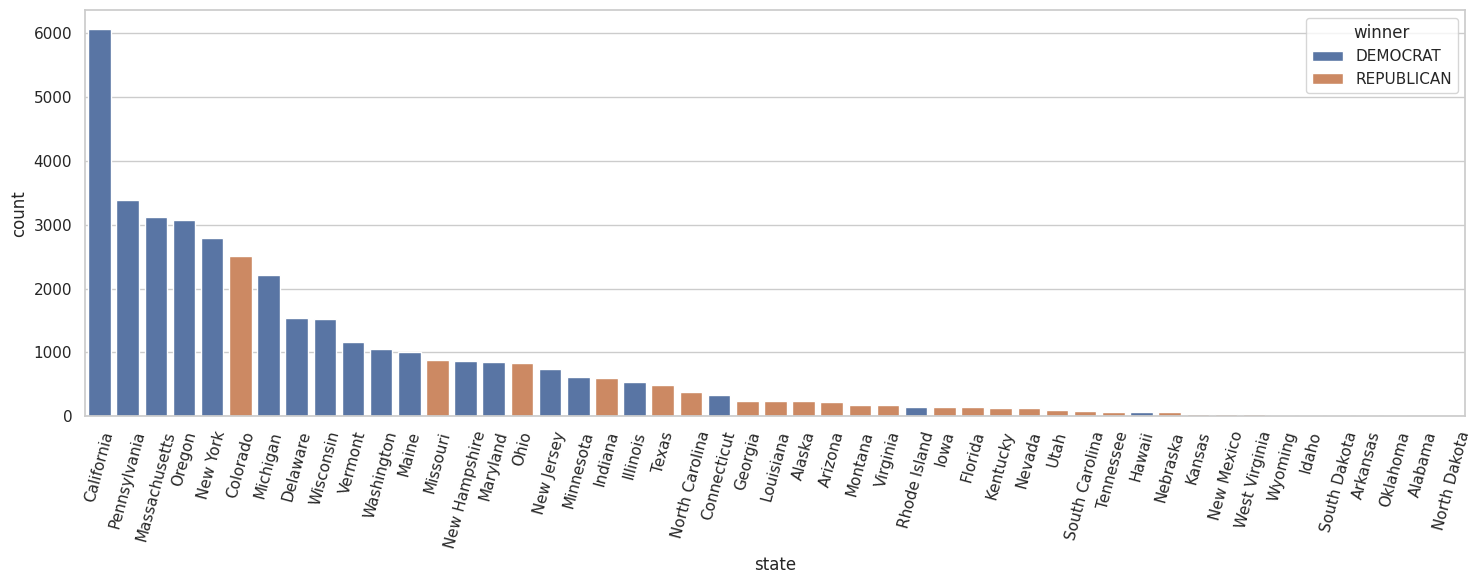

In [79]:
# See what are the most common states, I also need to see who were winners in those years
winners_over_years = "/content/party_winners_over_years.csv"
winners_over_years = pd.read_csv(winners_over_years)

winners_2004 = winners_over_years[winners_over_years['year'] == 2004][['state', 'year', 'winner']]
winners_2004.loc[:, 'state'] = winners_2004['state'].str.title()

# Extract all US breweries
us_breweries_2004 = rbr_2004[rbr_2004['brewery_location'].str.startswith('United States')]
us_breweries_2004 = us_breweries_2004['brewery_location'].str.split(', ').str[-1].value_counts()

us_br_wi_2004 = pd.merge(us_breweries_2004, winners_2004, left_on='brewery_location', right_on='state')

# Histogram showing the number of states
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.barplot(data=us_br_wi_2004, x='state', y='count', hue='winner')
plt.xticks(rotation=75)
plt.tight_layout()


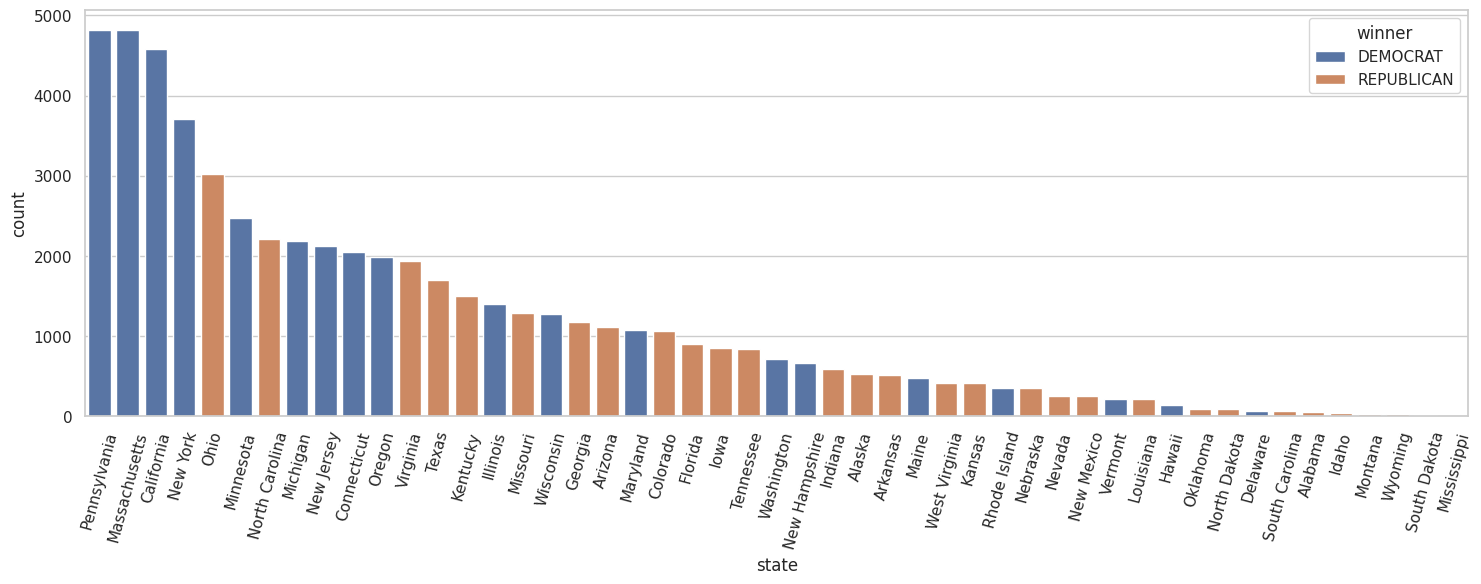

In [84]:
# Same analysis for reviewers
us_reviewers_2004 = rbr_2004[rbr_2004['user_location'].str.startswith('United States')]
us_reviewers_2004 = us_reviewers_2004['user_location'].str.split(', ').str[-1].value_counts()

us_re_wi_2004 = pd.merge(us_reviewers_2004, winners_2004, left_on='user_location', right_on='state')

# Histogram showing the number of states
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.barplot(data=us_re_wi_2004, x='state', y='count', hue='winner')
plt.xticks(rotation=75)
plt.tight_layout()